<a href="https://colab.research.google.com/github/SeeUSoon93/deepLearning/blob/main/ex02_%EC%9C%A0%EB%B0%A9%EC%95%94%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pwd

/content


In [2]:
# 작업 디렉토리 변경 cd = Change Directory
%cd "drive/MyDrive/Colab Notebooks/DeepLearning"

/content/drive/MyDrive/Colab Notebooks/DeepLearning


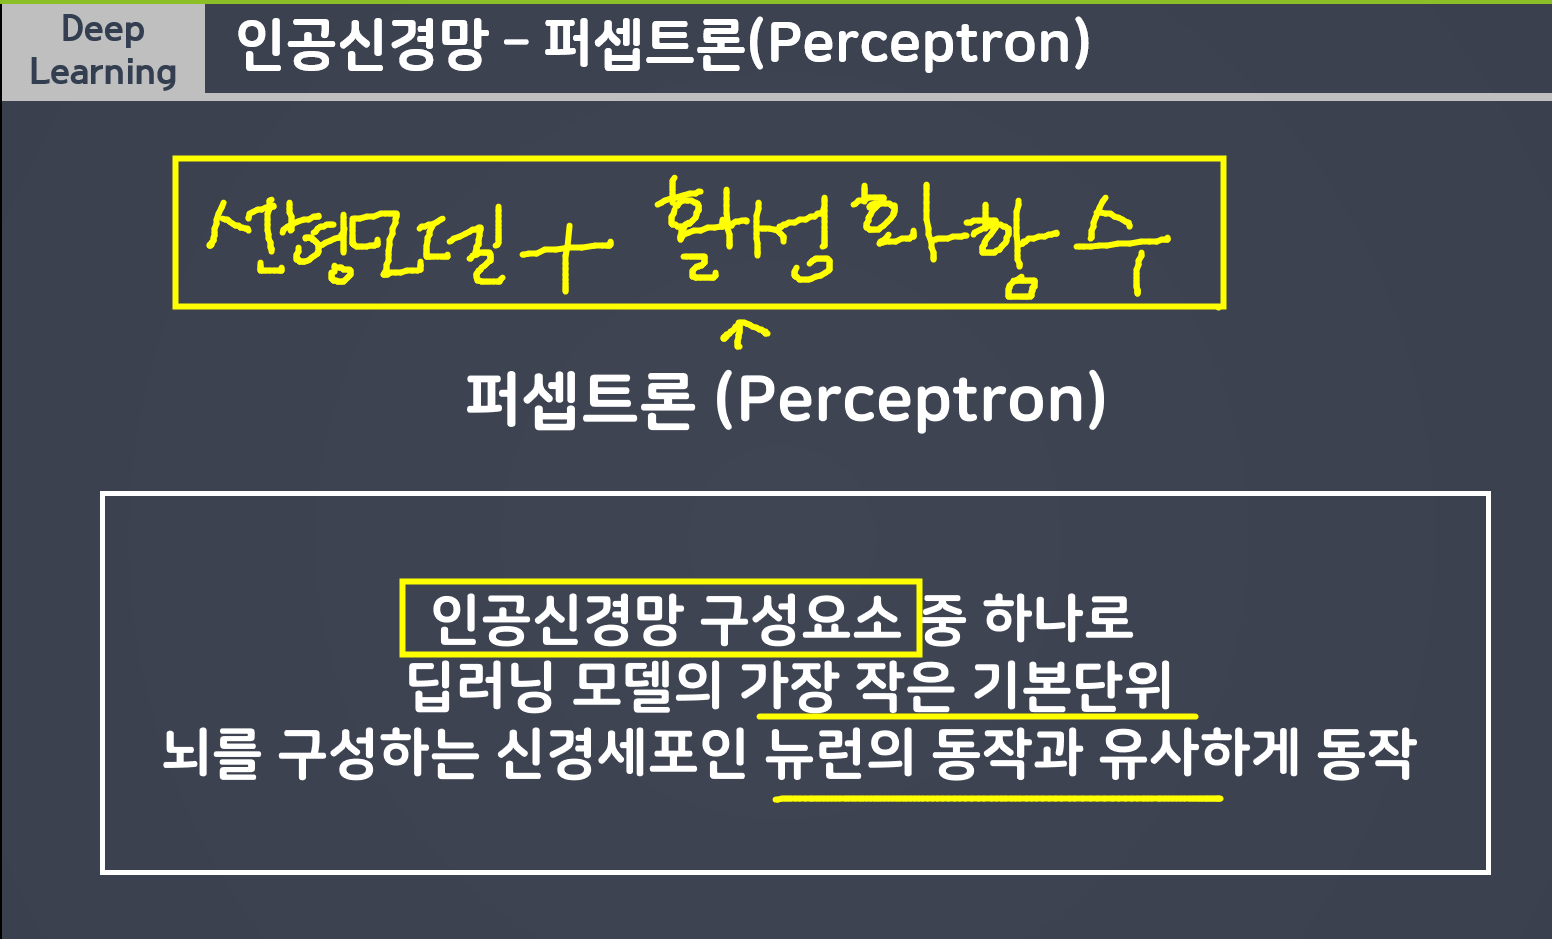
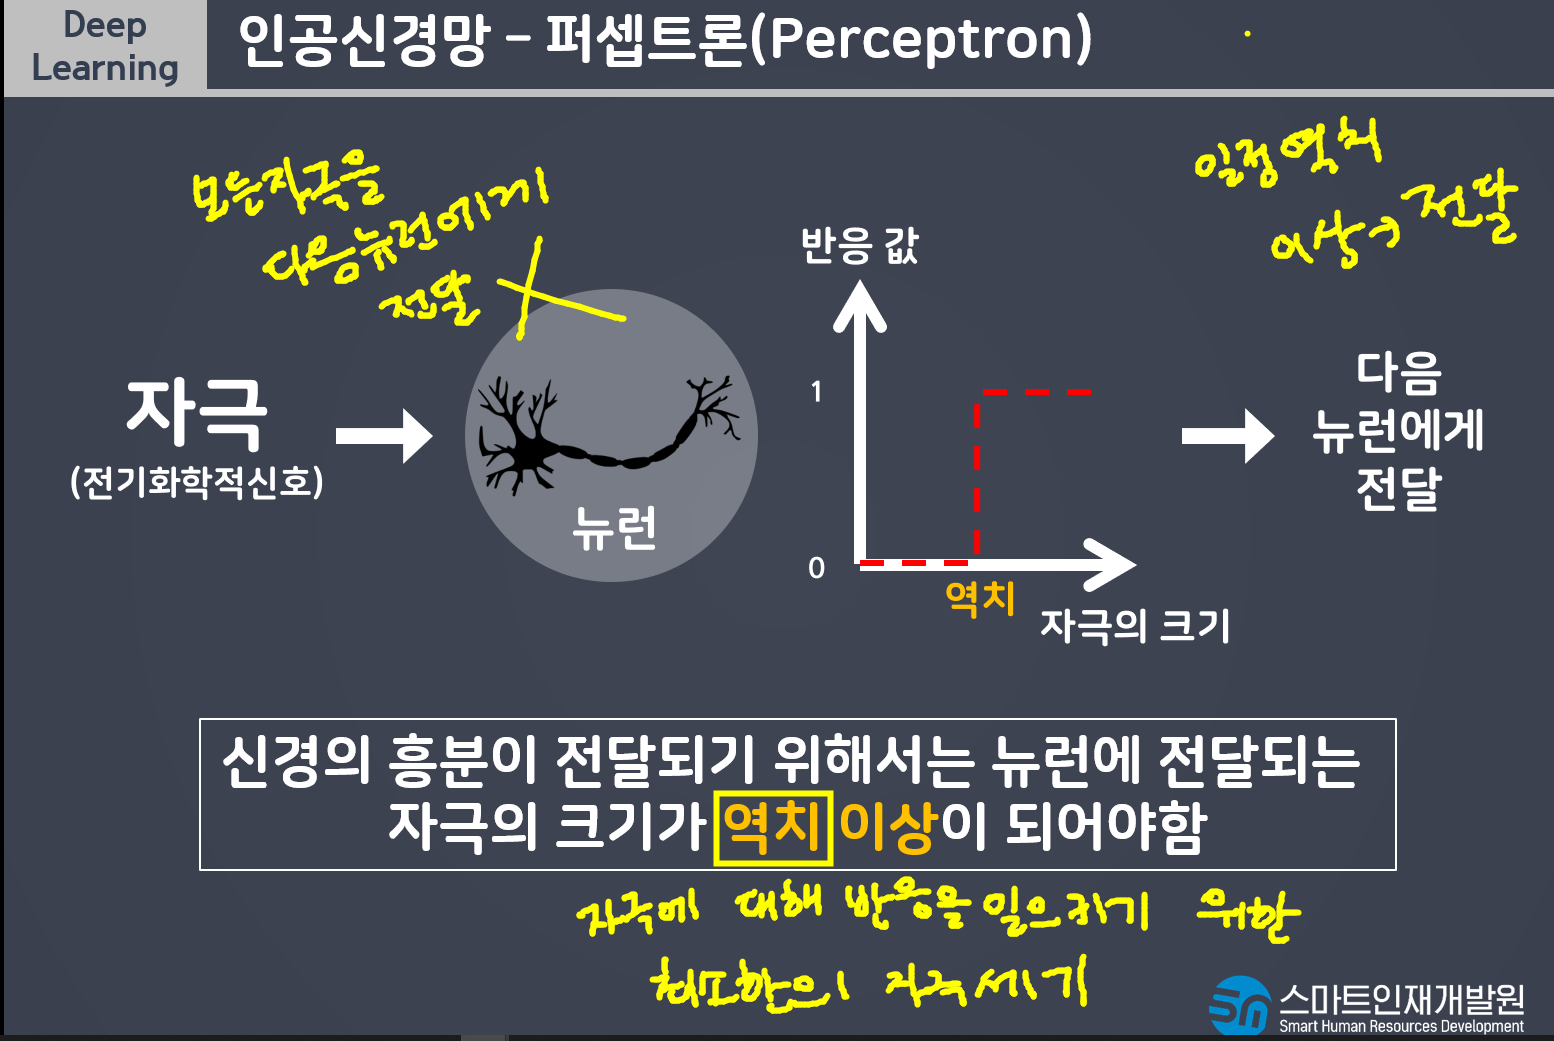
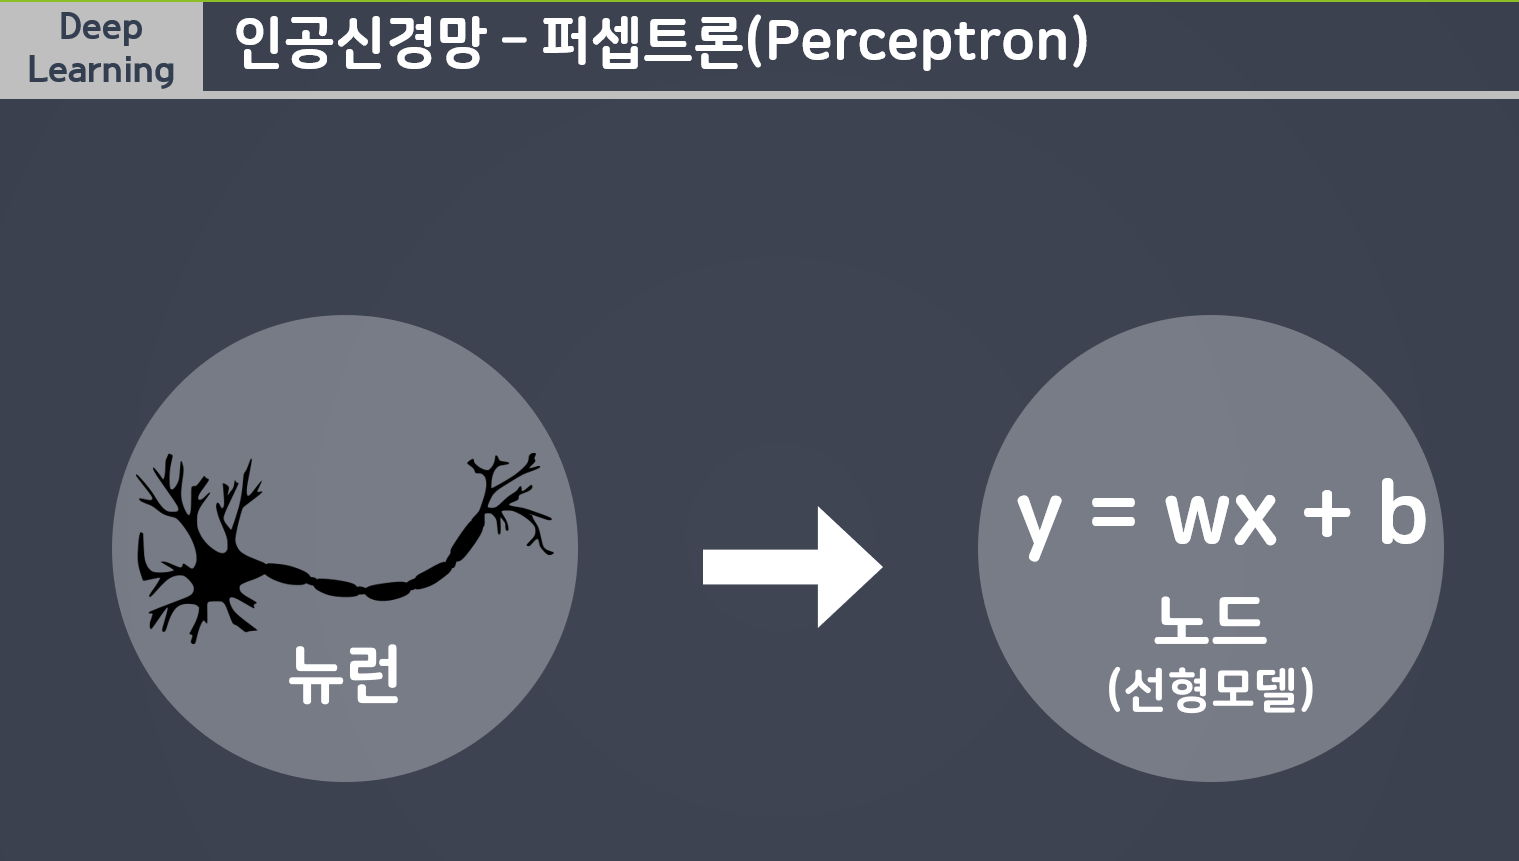
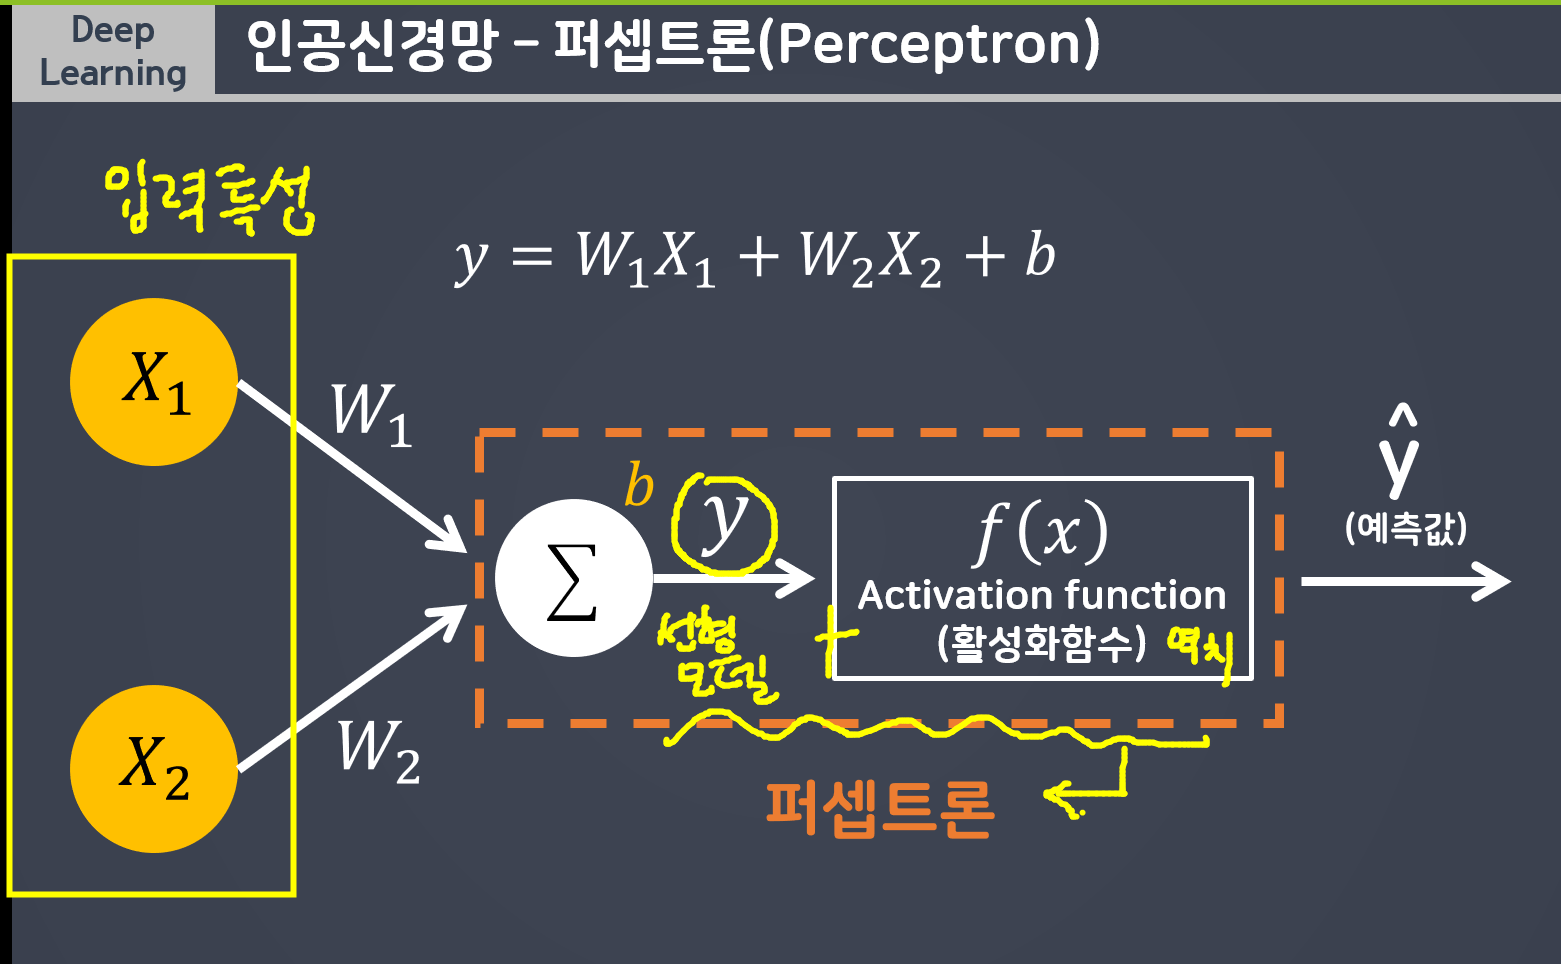
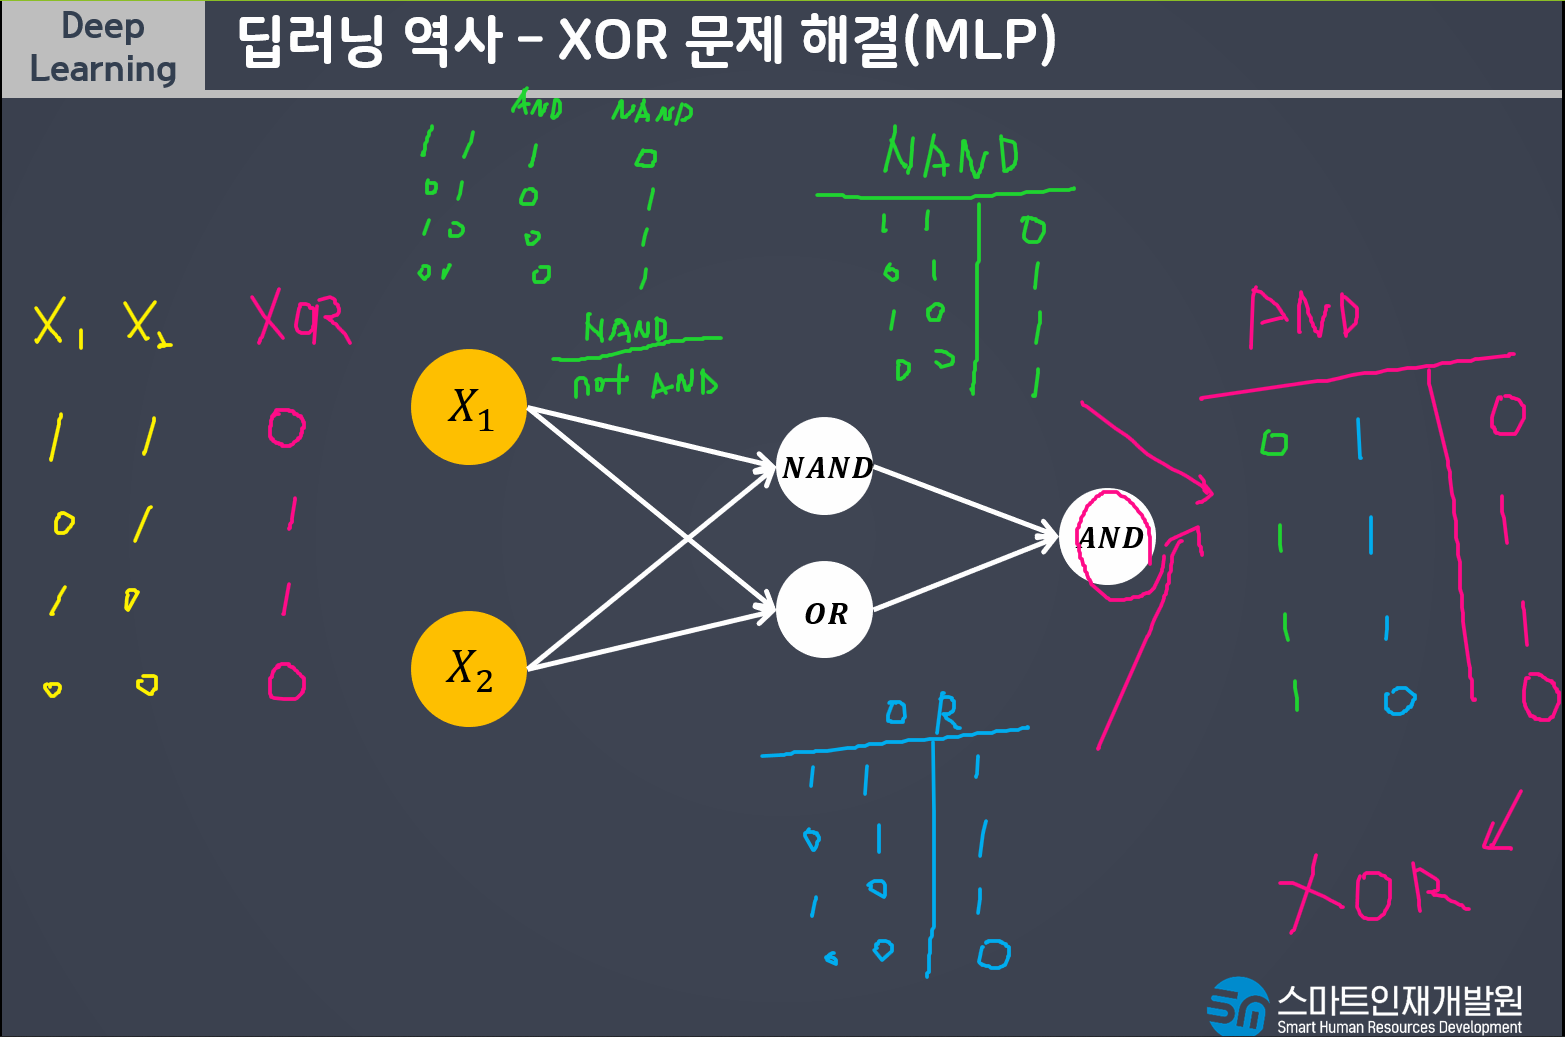

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


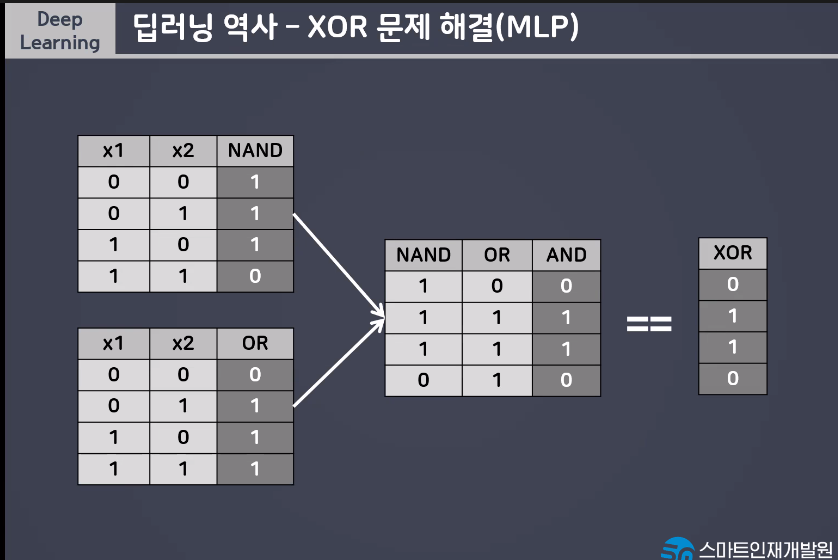

역치 -> 활성화 함수    
뉴런 -> 선형모델


(뉴런+역치)활성화함수 + 선형모델 -> 퍼셉트론 : 딥러닝 모델의 가장 작은 단위

### 다층 퍼셉트론 MLP (Multi Layer Perceptron)  
- 퍼셉트론을 여러 개의 층으로 구성하여 만든 신경

### 목표
- 환자데이터를 바탕으로 유방암이지 아닌지 분류하는 실습
- 딥러닝으로 이진분류 진행
- 분류에서 사용하는 딥러닝설계법, 학습방법 및 평가방법 차이점 알아보기!

In [4]:
# 라이브러리 및 데이터 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer # 사이킷런 내장된 유방암 데이터

In [5]:
# 데이터 확인
data = load_breast_cancer()
print(data)
# 머신러닝 데이터 구조 중 하나인 번치 객체 형태 (번치 - 묶음 / 파이썬의 딕셔너리와 비슷한 형태)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [6]:
# 키 값 확인
data.keys()
# data : 문제데이터(X), 입력특성
# target : 정답데이터(y)
# feature_name : 특성의 이름(컬럼명)
# target_name : 정답데이터 class의 이름
# DESCR : 데이터 설명

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# 정답데이터의 클래스명 확인
data.target_names
# 0 - malignat (악성)
# 1 - benign (양성)
# 클래스 2개 -> 이진분류를 하겠다

array(['malignant', 'benign'], dtype='<U9')

In [8]:
# 문제(X) 와 답(y) 분리
X = data['data']
y = data['target']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25)

In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(426, 30) (426,)
(143, 30) (143,)
